Tratamento do Dataset

In [18]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import numpy as np
pd.set_option('display.max_rows', None)

In [42]:
data=pd.read_csv('train.csv')

In [43]:
data.head()
data.tail()
#data.shape #(3207, 12)
#amostras estratificada.

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3202,Audi,Q5 2.0T Premium Plus,2016,"52,105 mi.",E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,A/T,White,Beige,At least 1 accident or damage reported,Yes,20499
3203,Mercedes-Benz,SL-Class SL 550,2014,"76,850 mi.",Gasoline,429.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Brown,Beige,At least 1 accident or damage reported,Yes,32999
3204,Cadillac,Escalade ESV Premium Luxury,2018,"74,150 mi.",Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gold,Brown,None reported,Yes,45000
3205,Ford,Edge SEL,2019,"26,465 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,White Platinum Tri-Coat Metallic,Ebony,None reported,NaN,24998
3206,Honda,Prelude Type SH,2001,"125,000 mi.",Gasoline,200.0HP 2.2L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Black,None reported,Yes,18000


objetivos:
sucesso : pelo menos 15%
Sucesso : carro elétrico - 5%


In [25]:
data.info() #milage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [4]:
#modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

1974 2024


In [44]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [6]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [7]:
# data.info()
# data['milage'].unique()
data['milage'].value_counts() 

milage
45000     14
55000     12
120000    12
60000     11
65000     11
18000     10
54000     10
44000     10
110000     9
22000      9
86000      9
33000      9
41000      9
73000      9
50000      9
46000      9
40000      9
92000      9
43000      9
39000      9
71000      8
119000     8
49000      8
96000      8
74000      8
52000      8
170000     8
72000      7
38000      7
17000      7
128000     7
82000      7
134000     7
104000     7
75000      7
15000      7
48000      7
53000      7
61000      7
115000     7
135000     7
36000      7
117000     6
107000     6
16000      6
87500      6
106000     6
130000     6
103000     6
102000     6
85000      6
27000      6
58000      6
12000      6
32000      6
57000      6
93000      6
111000     6
26000      6
88000      6
145000     6
25000      5
95000      5
1500       5
125000     5
70000      5
13000      5
77000      5
89000      5
19000      5
59000      5
98000      5
29000      5
36500      5
123000     5
112000     5
90000

In [77]:
data.isnull().sum()
# utilizar algoritmo de arvore de decisão para preencher esses valores?

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [73]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
# data['accident'].value_counts() # 89
# data['clean_title'].value_counts() #Yes-> 2740, os valores nulos só podem ser no( ou não se sabe)??

# # verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
#data['brand'].value_counts() # tudo certo
# data['model'].value_counts() # tudo certo
# data['model_year'].value_counts() # tudo certo
#data['engine'].value_counts() # – 38 -> nao se sabe
# data['transmission'].value_counts() # 4 -> nao se sabe 
# data['ext_col'].value_counts()# 11 -> nao se sabe
# data['int_col'].value_counts() # 98 -> nao se sabe
# for preco in data['price']: # tudo certo
#     if not isinstance(preco, int):
#         print('erro')




fuel_type
Gasoline          2795
Hybrid             152
E85 Flex Fuel      111
Diesel              82
–                   38
Plug-In Hybrid      28
not supported        1
Name: count, dtype: int64

In [71]:
# Substituir por variaveis Dummy
data['clean_title'] = data['clean_title'].replace({np.nan: 0, 'Yes': 1})
data[data['fuel_type'] == '-']


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [76]:
# PElo o resultado do R:
# moda= data['fuel_type'].mode()[0]  # Calcula a moda da coluna
moda2 =data['accident'].mode()[0]
# data['fuel_type'].replace({np.nan: moda}, inplace=True)
data['accident'].replace({np.nan: moda2}, inplace=True)

In [34]:
# Eu acho que todos que cometeram acidente tem o clean title como não. -> Não!
data[(data['accident'] == 'At least 1 accident or damage reported') & (data['clean_title'] == 1)] 


NameError: name 'll' is not defined

In [108]:
data.describe()

,model_year,milage,price
count,3207.000000,3207.000000,3.207000e+03
mean,2015.517930,64594.983785,4.487024e+04
std,6.131963,52387.260707,8.382969e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,23151.500000,1.705000e+04
50%,2017.000000,52253.000000,3.169800e+04
75%,2020.000000,93450.000000,4.999650e+04
max,2024.000000,405000.000000,2.954083e+06


model_year       Axes(0.125,0.11;0.227941x0.77)
milage        Axes(0.398529,0.11;0.227941x0.77)
price         Axes(0.672059,0.11;0.227941x0.77)
dtype: object

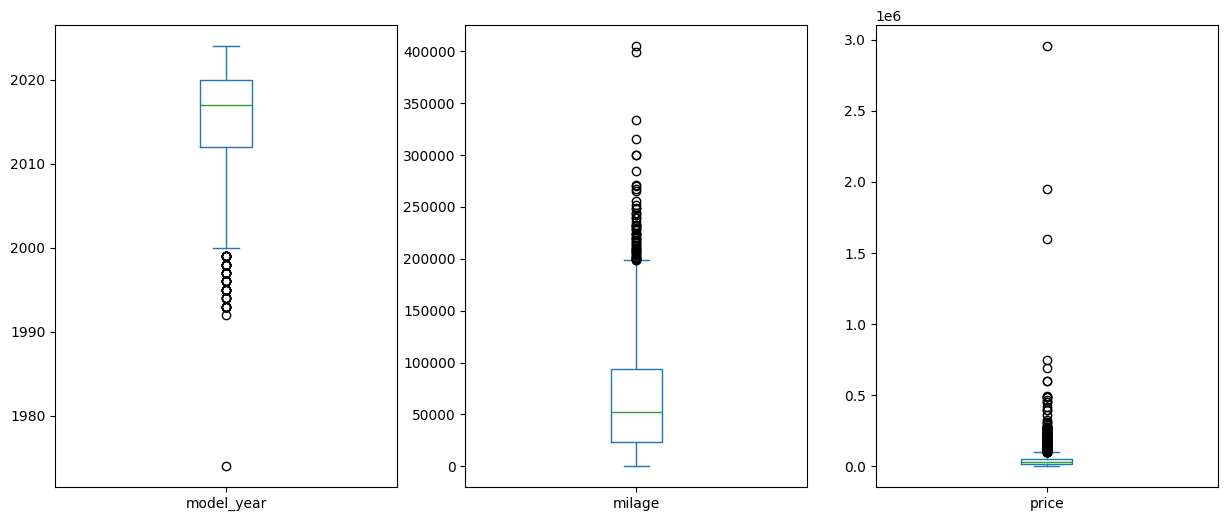

In [112]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [114]:
data[data['model_year']<1990] # outlier do 1º gráfico
data[data['milage']>350000] # outlier do 2º gráfico
data[data['price']>1500000] # 3º


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1650,Bugatti,Veyron 16.4 Grand Sport,2011,6330,Gasoline,8.0L W16 64V GDI DOHC Twin Turbo,7-Speed Automatic with Auto-Shift,White,White,None reported,Yes,1950995
2484,Maserati,Quattroporte Base,2005,32000,Gasoline,394.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Red,Beige,At least 1 accident or damage reported,Yes,2954083
2564,Porsche,Carrera GT Base,2005,4400,Gasoline,605.0HP 5.7L 10 Cylinder Engine Gasoline Fuel,6-Speed M/T,Gray,Black,None reported,Yes,1599000


In [78]:
data.to_csv('data_tratado.csv', index=False)